Exercícios Estatísca1

In [1]:
#Importação de bibliotecas

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from scipy.stats import norm, shapiro


Amostragem Simples

1) Gere uma amostra aleatória simples de um dataframe.


In [90]:
#Importação dos dados

dados = pd.read_csv('dados.csv', sep=';')
dados.head()

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
0,106,SANTANA DO LIVRAMENTO,12240.76,1088666.10
1,113,SANTO ANGELO,16575.82,800669.92
2,118,SAO FRANCISCO DE ASSIS,12037.61,466122.80
3,13,CACAPAVA DO SUL,13674.54,485535.86
4,120,SAO GABRIEL,19912.38,533719.86


In [91]:
dados.shape

(187, 4)

In [92]:
#Definir uma semente para manter a mesma aleatoriedade, em execuções futuras do codigo

np.random.seed(125)

#Amostra composta por 0 e 1, de tamanho 187. Com uma divisão de 70%/30% dos dados

amostra = np.random.choice(a = [0,1], size= 187, replace=True, p=[0.7, 0.3])

#Tamanho da amostra de 0

len(amostra[amostra == 0])

#Tamanho da amostra de 1

len(amostra[amostra == 1])

52

In [93]:
#Seleciona os dados naquele indice onde o valor da amostra é igual a 1

dados_amostra = dados.loc[amostra == 1]
dados_amostra.head()


,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
5,98,QUARAI,12552.51,381286.24
12,297,PARAISO DO SUL,13170.25,270262.04
14,239,JOIA,23312.14,347560.44
17,140,TAPES,14056.88,230054.99
20,79,MOSTARDAS,19565.25,284378.16


In [94]:
dados_amostra.shape

(52, 4)

Amostragem Sistemática

2) Implemente a técnica de amostragem sistemática em um conjunto de dados.

In [95]:
#Verificando o tamanho da base

dados.shape

(187, 4)

In [96]:
populacao = 187
amostra = 20

k = populacao/amostra

print(k)

9.35


In [97]:
#Definindo um valor aléatorio para inciar a amostra

v = np.random.randint(low = 1, high= k+1, size = 1)
print(v)

[8]


In [98]:
count = v[0]
escolhidos = []

for i in range(amostra):
      escolhidos.append(count)
      count += k 

escolhidos

[8,
 17.35,
 26.700000000000003,
 36.050000000000004,
 45.400000000000006,
 54.75000000000001,
 64.10000000000001,
 73.45,
 82.8,
 92.14999999999999,
 101.49999999999999,
 110.84999999999998,
 120.19999999999997,
 129.54999999999998,
 138.89999999999998,
 148.24999999999997,
 157.59999999999997,
 166.94999999999996,
 176.29999999999995,
 185.64999999999995]

In [99]:
#Transformando os elementos em inteiros

for i in range(len(escolhidos)):
    escolhidos[i] = int(escolhidos[i])
    
escolhidos

[8,
 17,
 26,
 36,
 45,
 54,
 64,
 73,
 82,
 92,
 101,
 110,
 120,
 129,
 138,
 148,
 157,
 166,
 176,
 185]

In [100]:
#Selecionando os elementos correspondentes do dataframe

dados_amostra = dados.loc[escolhidos]

dados_amostra

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
8,126,SAO LUIZ GONZAGA,15887.14,385185.68
17,140,TAPES,14056.88,230054.99
26,187,CORONEL BICACO,18904.82,242475.63
36,447,ITAARA,11615.69,147695.96
45,425,VILA NOVA DO SUL,13053.13,141895.69
54,463,UBIRETAMA,17624.98,147190.00
64,53,SAO VICENTE DO SUL,14478.75,119382.93
73,316,SEDE NOVA,16573.84,107428.88
82,378,MULITERNO,16581.60,97594.98
92,240,PALMARES DO SUL,19129.95,96770.63


Amostragem Estratificada

3) Divida um conjunto de dados em estratos e faça amostragem de cada estrato.

In [101]:
#Importando os dados

dados = pd.read_csv('iris.csv')
dados

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [102]:
dados['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [103]:
x,_,y,_ = train_test_split(dados.iloc[:,0:4], dados.iloc[:,4], test_size=0.5, stratify=dados.iloc[:,4]) 

y.value_counts()

class
Iris-versicolor    25
Iris-setosa        25
Iris-virginica     25
Name: count, dtype: int64

Medidas de Centralidade e Variabilidade

4) Calcule a média, mediana, moda, variância e desvio padrão de um conjunto de dados.
   
   Exemplo: Dada a lista [10, 12, 23, 23, 16, 23, 21, 16], calcule as medidas mencionadas.

In [104]:
#Criando a lista

lista = pd.Series([10,12,23,23,16,23,21,16])

In [105]:
#Moda

lista.mode()[0]


23

In [106]:
#Media

lista.mean()

18.0

In [107]:
#Mediana

lista.median()

18.5

In [108]:
#Desvio padrão

np.std(lista, ddof = 1)

5.237229365663817

Distribuição Normal

5) Gere uma distribuição normal com uma média e desvio padrão especificados e visualize o histograma.
   
   Exemplo: Gere 1000 números com média 50 e desvio padrão 10 e plote um histograma.

In [109]:
dados_normais = pd.Series(norm.rvs(size=1000))

dados_normais.head(10)


0   -1.666633
1    0.244660
2   -0.095099
3    0.821607
4   -0.994209
5   -0.681580
6   -1.795418
7   -0.624153
8    0.209768
9    1.291221
dtype: float64

(array([  7.,  14.,  86., 202., 268., 200., 141.,  65.,  12.,   5.]),
 array([-3.07726412, -2.43819315, -1.79912219, -1.16005123, -0.52098027,
         0.11809069,  0.75716165,  1.39623262,  2.03530358,  2.67437454,
         3.3134455 ]),
 <BarContainer object of 10 artists>)

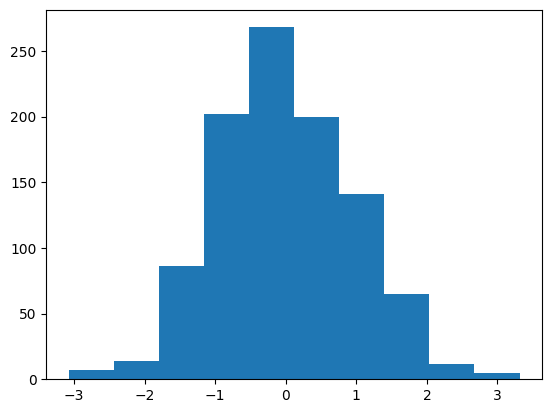

In [110]:
plt.hist(dados_normais)

Testes de Normalidade:

6) Realize um teste de normalidade em um conjunto de dados para verificar se ele segue uma distribuição normal.
   
   Exemplo: Considere a lista [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]. Aplique o teste de Shapiro-Wilk para verificar a normalidade.

In [111]:
#Criando a lista

lista = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

#Aplicando o teste de Shapiro-Wilk para verificar a normalidade

shapiro(lista)

#Como o pvalue=0.8923 aproximadamente, temos uma normalidade nos dados visto que é o pvalue é maior que 0.05

ShapiroResult(statistic=0.9701646110856056, pvalue=0.8923673061902978)